In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob
from matplotlib.ticker import FuncFormatter
import numpy as np

In [30]:
#os.chdir("/Users/naroacorettisanchez/Documents/GitHub/MultifunctionalVehicleFleets/results/38reps_FOOD_rebal")
#os.chdir("/Users/naroacorettisanchez/Documents/GitHub/MultifunctionalVehicleFleets/results/38reps_USER_norebal")
#os.chdir("/Users/naroacorettisanchez/Documents/GitHub/MultifunctionalVehicleFleets/results/38reps_MIXED_rebal")

os.chdir("/Users/naroacorettisanchez/Documents/GitHub/MultifunctionalVehicleFleets/results/SS_USER")

In [31]:
extension = 'csv'

#User trips
user_filenames =[i for i in glob.glob('people_trips_*.{}'.format(extension))]

#Food rips
food_filenames =[i for i in glob.glob('package_trips_*.{}'.format(extension))]


In [32]:
numitems_people = len(user_filenames)
print(numitems_people)

numitems_food = len(food_filenames)
print(numitems_food)

38
0


In [33]:
df_total_user = []

for f in user_filenames:
 temp_f = pd.read_csv(f)
 print(len(temp_f))
 df_total_user.append(temp_f)

19158
19158
19158
19157
19157
19158
19158
19157
19158
19158
19157
19158
19158
19157
19155
19158
19158
19158
19158
19158
19157
19158
19158
19158
19156
19157
19157
19157
19156
19158
19158
19158
19158
19158
19158
19156
19158
19157


In [34]:
df_total_food = []

for f in food_filenames:
 temp_f = pd.read_csv(f)
 print(len(temp_f))
 df_total_food.append(temp_f)

In [35]:
df_total_food

[]

In [36]:

counts_nbikes_all_food = []

for sim_user in df_total_food:
    sim_user['Day'] = sim_user['Day'] - 6
    sim_user['start_time_ed'] = pd.to_datetime(sim_user['Time']).dt.floor('15Min')
    counts_nbikes = sim_user.groupby(['Day', 'start_time_ed'])['NumBikes'].max().reset_index()
    counts_nbikes_all_food.append(counts_nbikes)

In [37]:

counts_nbikes_all = []

for sim_user in df_total_user:
    sim_user['Day'] = sim_user['Day'] - 6
    sim_user['start_time_ed'] = pd.to_datetime(sim_user['Time']).dt.floor('15Min')
    counts_nbikes = sim_user.groupby(['Day', 'start_time_ed'])['NumBikes'].max().reset_index()
    counts_nbikes_all.append(counts_nbikes)


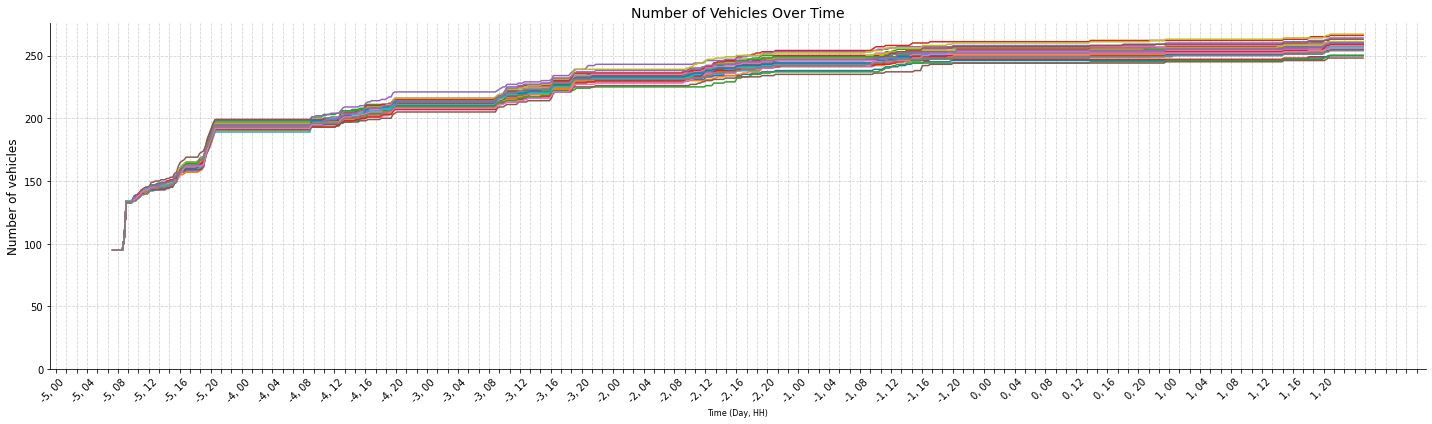

In [38]:
# Continue with your plotting code
fig, ax = plt.subplots(figsize=(20, 6))

# Plot each DataFrame as a separate line
for i, df in enumerate(counts_nbikes_all[:38]):
    total_minutes = (df['Day'] * 24 * 60) + (df['start_time_ed'].dt.hour * 60) + df['start_time_ed'].dt.minute
    ax.plot(total_minutes, df['NumBikes'], label=f'DataFrame {i+1}')

# Customize x-axis tick labels
days = df['Day'].unique()
hours = df['start_time_ed'].dt.hour.unique()
xtick_positions = [(day * 24 * 60) + (hour * 60) for day in days for hour in hours]
xtick_labels = [f'{day}, {hour:02d}' for day in days for hour in hours]

ax.set_xticks(xtick_positions)
ax.set_xticklabels(xtick_labels)

plt.xlabel('Time (Day, HH)', fontsize=8)
plt.ylabel('Number of vehicles', fontsize=12)
plt.title('Number of Vehicles Over Time', fontsize=14)

plt.grid(color='lightgray', linestyle='--')
plt.ylim(0)

plt.gca().set_facecolor('white')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.xticks(rotation=45, ha='right')

plt.tick_params(axis='both', which='both', bottom=True, top=False, left=True, right=False)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(integer=True, prune='both', nbins=168))

#plt.legend(loc='best')  # Show the legend

plt.tight_layout()
plt.show()

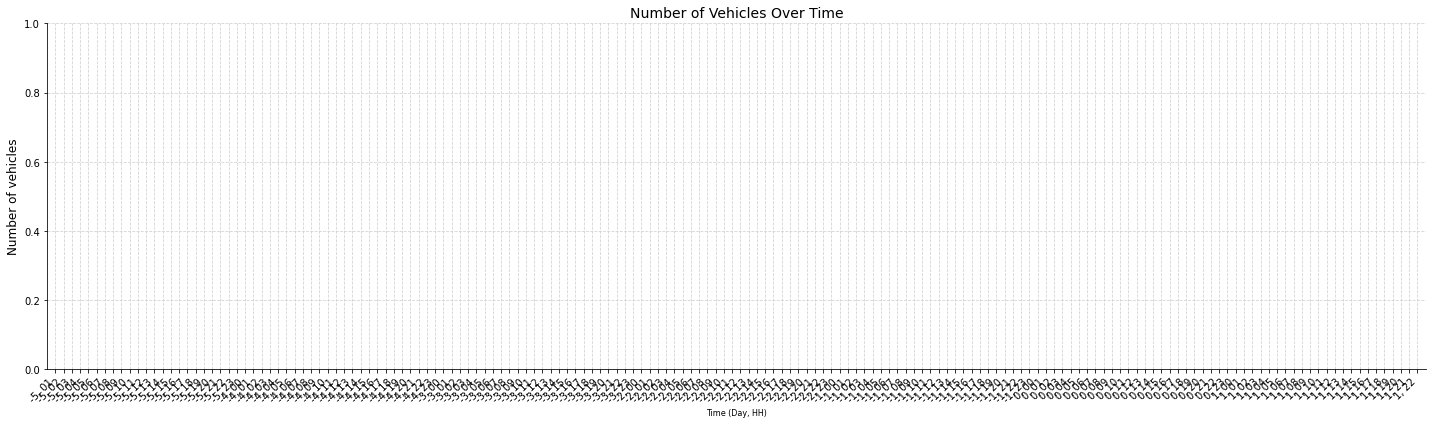

In [39]:
# Continue with your plotting code
fig, ax = plt.subplots(figsize=(20, 6))

# Plot each DataFrame as a separate line
for i, df in enumerate(counts_nbikes_all_food[:38]):
    total_minutes = (df['Day'] * 24 * 60) + (df['start_time_ed'].dt.hour * 60) + df['start_time_ed'].dt.minute
    ax.plot(total_minutes, df['NumBikes'], label=f'DataFrame {i+1}')

# Customize x-axis tick labels
days = df['Day'].unique()
hours = df['start_time_ed'].dt.hour.unique()
xtick_positions = [(day * 24 * 60) + (hour * 60) for day in days for hour in hours]
xtick_labels = [f'{day}, {hour:02d}' for day in days for hour in hours]

ax.set_xticks(xtick_positions)
ax.set_xticklabels(xtick_labels)

plt.xlabel('Time (Day, HH)', fontsize=8)
plt.ylabel('Number of vehicles', fontsize=12)
plt.title('Number of Vehicles Over Time', fontsize=14)

plt.grid(color='lightgray', linestyle='--')
plt.ylim(0)

plt.gca().set_facecolor('white')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.xticks(rotation=45, ha='right')

plt.tick_params(axis='both', which='both', bottom=True, top=False, left=True, right=False)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(integer=True, prune='both', nbins=168))

#plt.legend(loc='best')  # Show the legend

plt.tight_layout()
plt.show()

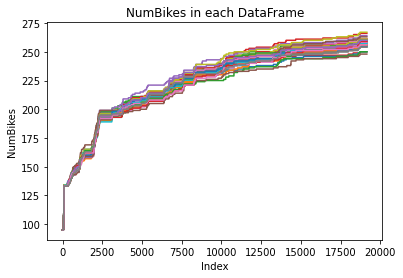

In [40]:
# Create a figure and axis for the plot
fig, ax = plt.subplots()

# Iterate through each DataFrame in df_total
for i, df in enumerate(df_total_user):
    # Assuming the column name is 'NumBikes'
    ax.plot(df['NumBikes'], label=f'DF {i+1}')

# Add labels and title to the plot
ax.set_xlabel('Index')
ax.set_ylabel('NumBikes')
ax.set_title('NumBikes in each DataFrame')

# Add a legend to identify each DataFrame's plot
#ax.legend()

# Show the plot
plt.show()

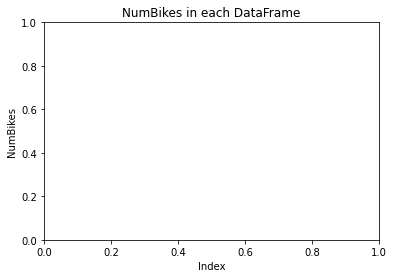

In [41]:
# Create a figure and axis for the plot
fig, ax = plt.subplots()

# Iterate through each DataFrame in df_total
for i, df in enumerate(df_total_food):
    # Assuming the column name is 'NumBikes'
    ax.plot(df['NumBikes'], label=f'DF {i+1}')

# Add labels and title to the plot
ax.set_xlabel('Index')
ax.set_ylabel('NumBikes')
ax.set_title('NumBikes in each DataFrame')

# Add a legend to identify each DataFrame's plot
#ax.legend()

# Show the plot
plt.show()

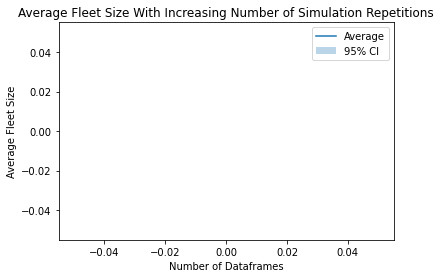

In [47]:
# Step 1: Create empty lists to store the maximum values, average values, and confidence intervals
max_values_day_7 = []
avg_values = []
ci_lower_values = []
ci_upper_values = []
ci_delta_values = []

# Step 2: Loop over the dataframes and calculate the maximum value for "day 13"
for i, df in enumerate(df_total_user):
    max_value_day_7 = df.loc[df['Day'] == 7, 'NumBikes'].max()
    max_values_day_7.append(max_value_day_7)
    
    # Calculate the average and confidence intervals with an increasing number of dataframes
    x_values = range(i + 1)
    avg_value = np.mean(max_values_day_7[:i + 1])
    std_value = np.std(max_values_day_7[:i + 1])
    ci_lower = avg_value - 1.96 * std_value / np.sqrt(i + 1)
    ci_upper = avg_value + 1.96 * std_value / np.sqrt(i + 1)
    ci_delta = ci_upper - ci_lower
    
    # Append the average, confidence interval, and delta values to their respective lists
    avg_values.append(avg_value)
    ci_lower_values.append(ci_lower)
    ci_upper_values.append(ci_upper)
    ci_delta_values.append(ci_delta)

# Step 3: Create the x-axis values
x_values = range(1, len(df_total_user) + 1)

# Step 4: Create the plot
plt.plot(x_values, avg_values, label='Average')
plt.fill_between(x_values, ci_lower_values, ci_upper_values, alpha=0.3, label='95% CI')
plt.xlabel('Number of Dataframes')
plt.ylabel('Average Fleet Size')
plt.title('Average Fleet Size With Increasing Number of Simulation Repetitions')
plt.legend()
plt.show()

# Step 5: Create a DataFrame with the data
data = {
    'Number of Dataframes': x_values,
    'Average': avg_values,
    'CI Lower': ci_lower_values,
    'CI Upper': ci_upper_values,
    'CI Delta': ci_delta_values
}
df_table_user = pd.DataFrame(data)



# Step 6: Save the DataFrame to a CSV file
#df_table.to_csv('average_ci_data.csv', index=False)


In [43]:
print(df_table_user)


    Number of Dataframes  Average  CI Lower  CI Upper  CI Delta
0                      1      NaN       NaN       NaN       NaN
1                      2      NaN       NaN       NaN       NaN
2                      3      NaN       NaN       NaN       NaN
3                      4      NaN       NaN       NaN       NaN
4                      5      NaN       NaN       NaN       NaN
5                      6      NaN       NaN       NaN       NaN
6                      7      NaN       NaN       NaN       NaN
7                      8      NaN       NaN       NaN       NaN
8                      9      NaN       NaN       NaN       NaN
9                     10      NaN       NaN       NaN       NaN
10                    11      NaN       NaN       NaN       NaN
11                    12      NaN       NaN       NaN       NaN
12                    13      NaN       NaN       NaN       NaN
13                    14      NaN       NaN       NaN       NaN
14                    15      NaN       

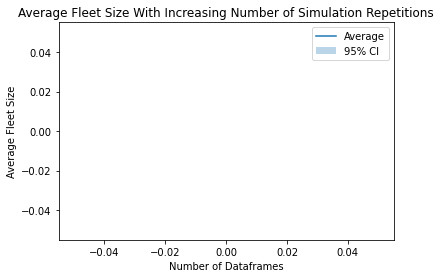

In [44]:
# Step 1: Create empty lists to store the maximum values, average values, and confidence intervals
max_values_day_7 = []
avg_values = []
ci_lower_values = []
ci_upper_values = []
ci_delta_values = []

# Step 2: Loop over the dataframes and calculate the maximum value for "day 13"
for i, df in enumerate(df_total_food):
    max_value_day_7 = df.loc[df['Day'] == 7, 'NumBikes'].max()
    max_values_day_7.append(max_value_day_7)
    
    # Calculate the average and confidence intervals with an increasing number of dataframes
    x_values = range(i + 1)
    avg_value = np.mean(max_values_day_7[:i + 1])
    std_value = np.std(max_values_day_7[:i + 1])
    ci_lower = avg_value - 1.96 * std_value / np.sqrt(i + 1)
    ci_upper = avg_value + 1.96 * std_value / np.sqrt(i + 1)
    ci_delta = ci_upper - ci_lower
    
    # Append the average, confidence interval, and delta values to their respective lists
    avg_values.append(avg_value)
    ci_lower_values.append(ci_lower)
    ci_upper_values.append(ci_upper)
    ci_delta_values.append(ci_delta)

# Step 3: Create the x-axis values
x_values = range(1, len(df_total_food) + 1)

# Step 4: Create the plot
plt.plot(x_values, avg_values, label='Average')
plt.fill_between(x_values, ci_lower_values, ci_upper_values, alpha=0.3, label='95% CI')
plt.xlabel('Number of Dataframes')
plt.ylabel('Average Fleet Size')
plt.title('Average Fleet Size With Increasing Number of Simulation Repetitions')
plt.legend()
plt.show()

# Step 5: Create a DataFrame with the data
data = {
    'Number of Dataframes': x_values,
    'Average': avg_values,
    'CI Lower': ci_lower_values,
    'CI Upper': ci_upper_values,
    'CI Delta': ci_delta_values
}
df_table_food = pd.DataFrame(data)



# Step 6: Save the DataFrame to a CSV file
#df_table.to_csv('average_ci_data.csv', index=False)


In [45]:
print(df_table_food)

Empty DataFrame
Columns: [Number of Dataframes, Average, CI Lower, CI Upper, CI Delta]
Index: []


In [46]:
###In the mixed scenario, we need to combine the metrics

# Step 1: Create empty lists to store the maximum values, average values, and confidence intervals
max_values_day_7 = []
avg_values = []
ci_lower_values = []
ci_upper_values = []
ci_delta_values = []

# Step 2: Loop over the dataframes and calculate the maximum value for "day 13"
for i in range(max(numitems_people,numitems_food)):
    #Get that sim number from Users and Food
    df_f=df_total_food[i]
    df_u= df_total_user[i]

    #Find the max value 
    max_value_day_7_f = df_f.loc[df_f['Day'] == 7, 'NumBikes'].max()
    max_value_day_7_u = df_u.loc[df_u['Day'] == 7, 'NumBikes'].max()
    max_value_day_7 = max(max_value_day_7_f, max_value_day_7_u)
    max_values_day_7.append(max_value_day_7)
    
    print(max_value_day_7_f, max_value_day_7_u, max_value_day_7)
    # Calculate the average and confidence intervals with an increasing number of dataframes
    x_values = range(i + 1)
    avg_value = np.mean(max_values_day_7[:i + 1])
    std_value = np.std(max_values_day_7[:i + 1])
    ci_lower = avg_value - 1.96 * std_value / np.sqrt(i + 1)
    ci_upper = avg_value + 1.96 * std_value / np.sqrt(i + 1)
    ci_delta = ci_upper - ci_lower
    
    # Append the average, confidence interval, and delta values to their respective lists
    avg_values.append(avg_value)
    ci_lower_values.append(ci_lower)
    ci_upper_values.append(ci_upper)
    ci_delta_values.append(ci_delta)

# Step 3: Create the x-axis values
x_values = range(1, len(df_total_food) + 1)

# Step 4: Create the plot
plt.plot(x_values, avg_values, label='Average')
plt.fill_between(x_values, ci_lower_values, ci_upper_values, alpha=0.3, label='95% CI')
plt.xlabel('Number of Dataframes')
plt.ylabel('Average Fleet Size')
plt.title('Average Fleet Size With Increasing Number of Simulation Repetitions')
plt.legend()
plt.show()

# Step 5: Create a DataFrame with the data
data = {
    'Number of Dataframes': x_values,
    'Average': avg_values,
    'CI Lower': ci_lower_values,
    'CI Upper': ci_upper_values,
    'CI Delta': ci_delta_values
}
df_table_mixed = pd.DataFrame(data)

IndexError: list index out of range